In [1]:
import os
import cv2
import glob
import os, shutil
from keras import layers
from keras import models
import keras.utils as image
import matplotlib.pyplot as plt 
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

import tensorflow.compat.v2 as tf
tf.keras.preprocessing.image.load_img
import numpy as np


2023-04-11 10:16:22.843947: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Set the root directory path where your images are stored
root_dir = "/Users/matt/Desktop/archive"

classZero = []
classOne = []

# Loop through all the subdirectories in the root directory
for subdir in os.listdir(root_dir):
    subdir_path = os.path.join(root_dir, subdir)

    # Loop through all the image files in the subdirectory
    for file_path in glob.glob(subdir_path + "/*/*class0.png", recursive=True):
        # Load the image using cv2 and append it to the images list
        image = cv2.imread(file_path)
        classZero.append(image)
        
        # Loop through all the image files in the subdirectory
    for file_path in glob.glob(subdir_path + "/*/*class1.png", recursive=True):
        # Load the image using cv2 and append it to the images list
        image = cv2.imread(file_path)
        classOne.append(image)

In [3]:

len(classOne)

78786

In [4]:
len(classZero)

198738

In [5]:
    print('Total number of images: {}'.format(len(classOne+classZero)))
    print('Number of IDC(-) Images: {}'.format(len(classZero)))
    print('Number of IDC(+) Images: {}'.format(len(classOne)))
    print('Image shape (Width, Height, Channels): {}'.format(classZero[0].shape))

Total number of images: 277524
Number of IDC(-) Images: 198738
Number of IDC(+) Images: 78786
Image shape (Width, Height, Channels): (50, 50, 3)


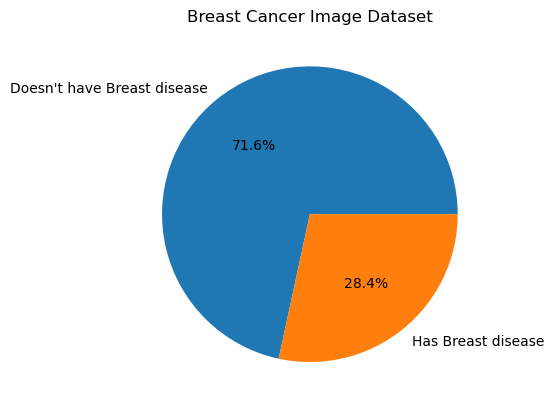

In [7]:
counts = [len(classZero), len(classOne)]
labels = ['Doesn\'t have Breast disease', 'Has Breast disease']

plt.pie(counts, labels=labels, autopct='%1.1f%%')
# plt.xlabel('Class')
# plt.ylabel('Count')
plt.title('Breast Cancer Image Dataset')
plt.show()

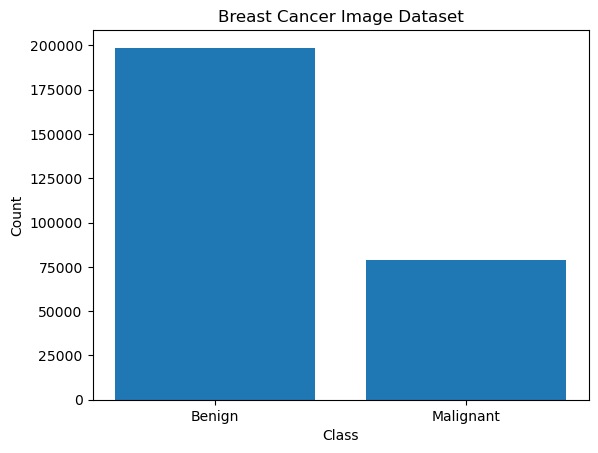

In [8]:
counts = [len(classZero), len(classOne)]
labels = ['Benign', 'Malignant']

plt.bar(labels, counts)
plt.title('Breast Cancer Image Dataset')
plt.xlabel('Class')
plt.ylabel('Count')



plt.show()


In [6]:
classZero = classZero[0:40000]
classOne = classOne[0:40000]

In [7]:
len(classZero)

40000

In [11]:
len(classOne)

40000

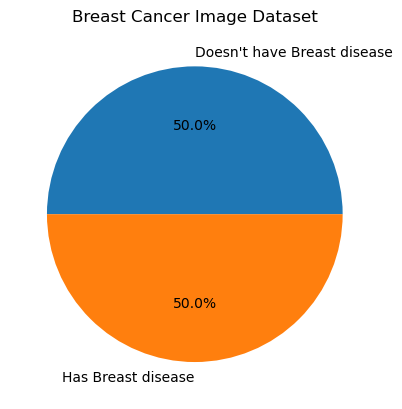

In [12]:
counts = [len(classZero), len(classOne)]
labels = ['Doesn\'t have Breast disease', 'Has Breast disease']

plt.pie(counts, labels=labels, autopct='%1.1f%%')
# plt.xlabel('Class')
# plt.ylabel('Count')
plt.title('Breast Cancer Image Dataset')
plt.show()

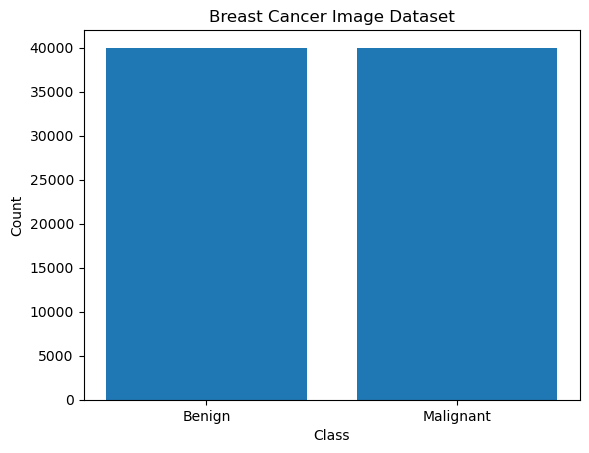

In [13]:
counts = [len(classZero), len(classOne)]
labels = ['Benign', 'Malignant']

plt.bar(labels, counts)
plt.title('Breast Cancer Image Dataset')
plt.xlabel('Class')
plt.ylabel('Count')



plt.show()

In [8]:
save_dir = "/Users/matt/Desktop/Output/Zero"

os.makedirs(save_dir, exist_ok=True)

for i, image in enumerate(classZero):
    cv2.imwrite(os.path.join(save_dir, f"image_{i}_class0.png"), image)

In [9]:
save_dir = "/Users/matt/Desktop/Output/One"

os.makedirs(save_dir, exist_ok=True)

for i, image in enumerate(classOne):
    cv2.imwrite(os.path.join(save_dir, f"image_{i}_class1.png"), image)

In [10]:
original_dataset_dir = '/Users/matt/Desktop/Output'    

base_dir = '/Users/matt/Desktop/CNNData'                 
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')                                
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')                      
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')                                  
os.mkdir(test_dir)

train_zero_dir = os.path.join(train_dir, 'Zero')                           
os.mkdir(train_zero_dir)                                                   

train_one_dir = os.path.join(train_dir, 'One')                           
os.mkdir(train_one_dir)                                                   

validation_zero_dir = os.path.join(validation_dir, 'Zero')                 
os.mkdir(validation_zero_dir)                                              

validation_one_dir = os.path.join(validation_dir, 'One')                 
os.mkdir(validation_one_dir)                                              

test_zero_dir = os.path.join(test_dir, 'Zero')                             
os.mkdir(test_zero_dir)                                                    

test_one_dir = os.path.join(test_dir, 'One')                             
os.mkdir(test_one_dir)  

In [12]:
classZero_data_dir = '/Users/matt/Desktop/Output/Zero' 
classOne_data_dir = '/Users/matt/Desktop/Output/One' 

fnames = ['image_{}_class0.png'.format(i) for i in range(24000)]                     
for fname in fnames:                                                       
    src = os.path.join(classZero_data_dir, fname)                        
    dst = os.path.join(train_zero_dir, fname)                              
    shutil.copyfile(src, dst)                                              

fnames = ['image_{}_class0.png'.format(i) for i in range(24000, 32000)]               
for fname in fnames:                                                       
    src = os.path.join(classZero_data_dir, fname)                        
    dst = os.path.join(validation_zero_dir, fname)                         
    shutil.copyfile(src, dst)                                              

fnames = ['image_{}_class0.png'.format(i) for i in range(32000, 40000)]               
for fname in fnames:                                                       
    src = os.path.join(classZero_data_dir, fname)                        
    dst = os.path.join(test_zero_dir, fname)                               
    shutil.copyfile(src, dst)                                              

fnames = ['image_{}_class1.png'.format(i) for i in range(24000)]                     
for fname in fnames:                                                       
    src = os.path.join(classOne_data_dir, fname)                        
    dst = os.path.join(train_one_dir, fname)                              
    shutil.copyfile(src, dst)                                             
fnames = ['image_{}_class1.png'.format(i) for i in range(24000, 32000)]               
for fname in fnames:                                                       
    src = os.path.join(classOne_data_dir, fname)                       
    dst = os.path.join(validation_one_dir, fname)                         
    shutil.copyfile(src, dst)                                              

fnames = ['image_{}_class1.png'.format(i) for i in range(32000, 40000)]               
for fname in fnames:                                                       
    src = os.path.join(classOne_data_dir, fname)                        
    dst = os.path.join(test_one_dir, fname)                               
    shutil.copyfile(src, dst) 

In [13]:
print('total training zero images:', len(os.listdir(train_zero_dir)))
print('total training one images:', len(os.listdir(train_one_dir)))

print('total validation zero images:', len(os.listdir(validation_zero_dir)))

print('total validation one images:', len(os.listdir(validation_one_dir)))


print('total test zero images:', len(os.listdir(test_zero_dir)))
print('total test one images:', len(os.listdir(test_one_dir)))

total training zero images: 24000
total training one images: 24000
total validation zero images: 8000
total validation one images: 8000
total test zero images: 8000
total test one images: 8000


In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(50, 50, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

2023-04-10 21:23:13.254379: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/Users/matt/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [22]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)              

train_generator = train_datagen.flow_from_directory(
        train_dir,                                             
        target_size=(50, 50),                                 
        batch_size=32,
        class_mode='binary')                                   

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(50, 50),
        batch_size=32,
        class_mode='binary')

Found 48000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
      train_generator,
  
      epochs=20,
      validation_data=validation_generator,
      )

Epoch 1/20


/var/folders/jt/l6vb49ld2m5fdmm0xf1hs_t00000gn/T/ipykernel_17723/1193693763.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


1500/1500 [==============================] - 96s 63ms/step - loss: 0.5709 - acc: 0.7133 - val_loss: 0.4295 - val_acc: 0.8265
Epoch 2/20
1500/1500 [==============================] - 95s 63ms/step - loss: 0.5208 - acc: 0.7589 - val_loss: 0.4548 - val_acc: 0.7862
Epoch 3/20
1500/1500 [==============================] - 96s 64ms/step - loss: 0.4978 - acc: 0.7712 - val_loss: 0.4869 - val_acc: 0.7754
Epoch 4/20
1500/1500 [==============================] - 96s 64ms/step - loss: 0.4762 - acc: 0.7846 - val_loss: 0.5309 - val_acc: 0.7574
Epoch 5/20
1500/1500 [==============================] - 96s 64ms/step - loss: 0.4561 - acc: 0.7944 - val_loss: 0.4093 - val_acc: 0.8161
Epoch 6/20
1500/1500 [==============================] - 95s 64ms/step - loss: 0.4425 - acc: 0.8032 - val_loss: 0.4154 - val_acc: 0.8212
Epoch 7/20
1500/1500 [==============================] - 95s 64ms/step - loss: 0.4315 - acc: 0.8077 - val_loss: 0.3716 - val_acc: 0.8421
Epoch 8/20
1500/1500 [==============================] - ETA

In [14]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(50, 50, 3))



2023-04-11 10:23:55.065150: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 50, 50, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 50, 50, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 25, 25, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 25, 25, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 25, 25, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [16]:
from keras import models
from keras import layers

model2 = models.Sequential()
model2.add(conv_base)
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [17]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 14,846,273
Trainable params: 14,846,273
Non-trainable params: 0
_________________________________________________________________


In [18]:
print('This is the number of trainable weights before freezing the conv base:', len(model2.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights '
          'after freezing the conv base:', len(model2.trainable_weights))


This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [19]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)                

train_generator = train_datagen.flow_from_directory(
        train_dir,                                               
        target_size=(50, 50),                                  
        batch_size=32,
        class_mode='binary')                                     

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(50, 50),
        batch_size=32,
        class_mode='binary')

model2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model2.fit_generator(
      train_generator,
      
      epochs=30,
      validation_data=validation_generator,
     )

Found 48000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.


/Users/matt/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/var/folders/jt/l6vb49ld2m5fdmm0xf1hs_t00000gn/T/ipykernel_22246/2616947897.py:32: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model2.fit_generator(


Epoch 1/30
1500/1500 [==============================] - 469s 312ms/step - loss: 0.6049 - acc: 0.6750 - val_loss: 0.5390 - val_acc: 0.7294
Epoch 2/30
1500/1500 [==============================] - ETA: 0s - loss: 0.5587 - acc: 0.7221


KeyboardInterrupt

